In [1]:
#importing and merging all months data


In [2]:
import pandas as pd
import os
#using os library to store all the csv files in a list
files=[file for file in os.listdir('./Sales_Data')]
#initialising a dataframe for storing all the data combined
all_months_data=pd.DataFrame()


In [3]:
#for loop for merging all data into one file
for file in files:
    #store each dataframe into the variable df
    df=pd.read_csv('./Sales_Data/'+file)
    #concatenating each of the dataframe into the dataframe variable all_months_data
    all_months_data=pd.concat([all_months_data,df])

In [4]:
#saving the new dataframe into a csv file
all_months_data.to_csv('all_data.csv',index=False)

#checking the new dataframe:
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean the data:

***Drop the rows with NAN:***

In [5]:
nan_data=all_months_data[all_months_data.isna().any(axis=1)]
nan_data.head(12)
#cleaning done for making a new months column
#NaN values creates an error while processing the whole data.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_months_data=all_months_data.dropna(how='all')

***Droping columns with 'or':***

In [7]:
all_months_data=all_months_data[all_months_data['Order Date'].str[0:2]!='Or']
#Here 'Or' String from date is removed for making Order Date column apt for further operations.

***Converting columns into the correct type:***

In [8]:
all_months_data['Quantity Ordered']=pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each']=pd.to_numeric(all_months_data['Price Each'])

## Data Analysing:

***Creating new column of months to sort data based on month:***

In [9]:
all_months_data['Month']=all_months_data['Order Date'].str[0:2]
all_months_data['Month']=all_months_data['Month'].astype('int32')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


***Creating new column for total sales:***

In [10]:
all_months_data['Sales']=all_months_data['Price Each']*all_months_data['Quantity Ordered']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### 1. Find the best month for sales:

In [11]:
all_months_data.groupby('Month').sum().astype('int64')

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768,1822256
2,13449,2188884,2202022
3,17005,2791207,2807100
4,20558,3367671,3390670
5,18667,3135125,3152606
6,15253,2562025,2577802
7,16072,2632539,2647775
8,13448,2230345,2244467
9,13109,2084992,2097560


In [12]:
results=all_months_data.groupby('Month').sum()

***Ploting the sales of each month:***

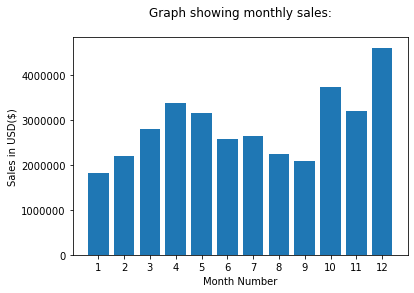

In [13]:
import matplotlib.pyplot as plt

months1=range(1,13)

plt.bar(months1,results['Sales'])
plt.ticklabel_format(style='plain')
plt.title('Graph showing monthly sales:\n')
plt.xticks(months1)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD($)')
plt.show()

### 2. Finding the city that generated highest sales: 

***Add a city column:***

In [14]:
#function to find the state name
def getstate(state):
    return state.split(',')[1]

#functtion to find the City name
def getcity(city):
    return city.split(',')[2].split(' ')[1]

all_months_data['City']=all_months_data['Purchase Address'].apply(lambda x:f"{getstate(x)} ({getcity(x)})") 
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [15]:
city_results=all_months_data.groupby('City').sum()
city=city_results.index

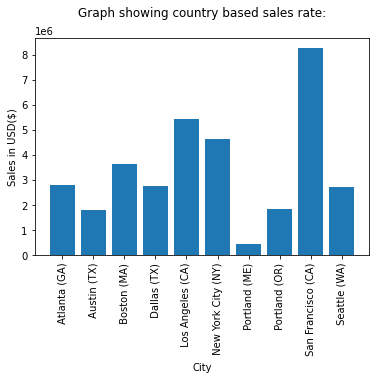

<Figure size 432x288 with 0 Axes>

In [16]:
plt.bar(city,city_results['Sales'])
plt.xticks(rotation=90)
plt.title('Graph showing country based sales rate:\n')
plt.xlabel('City')
plt.ylabel('Sales in USD($)')
plt.show()
plt.savefig("graph_country_sales.jpg")

### 3. Time that is suitable for showing adverticements:

In [17]:
#Changing the format of the Order Date in the dataframe:
all_months_data['Order Date']=pd.to_datetime(all_months_data['Order Date'])

In [18]:
#adding hour column:
all_months_data['Hour']=all_months_data['Order Date'].dt.hour
all_months_data['Minutes']=all_months_data['Order Date'].dt.minute

In [19]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [20]:
all_months_data.groupby(['Hour']).sum()

,Quantity Ordered,Price Each,Month,Sales,Minutes
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


In [21]:
#Creating an x-axis hour element as list:
#hours = [hour for hour,df in all_months_data.groupby('Hour')]
hr=all_months_data.groupby(['Hour']).sum()
hours=hr.index

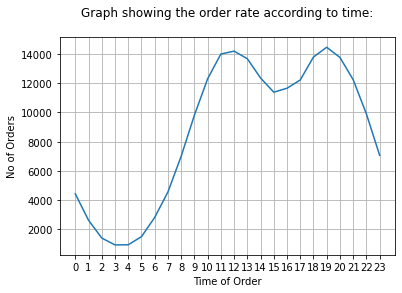

In [22]:
#ploting the peek hours using matplotlib
plt.plot(hours,hr['Quantity Ordered'])
#lt.ticklabel_format(style='plain')
plt.title('Graph showing the order rate according to time:\n')
plt.xticks(hours)
plt.xlabel('Time of Order')
plt.ylabel('No of Orders')
plt.grid()
plt.show()


In [23]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


### 4. Products most often sold together:

In [24]:
#Finding all the duplicated order id(products ordered at the same time will have the same product id)
df=all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

#creating new column to store all the products ordered with same order id
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
all_months_data.head()

<ipython-input-24-9a27f5d56ef1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [25]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [26]:
#using some new libraries to find out most choosen pair:
from itertools import combinations
from collections import Counter

count=Counter()

#Counting the number of times each combinations are ordered:
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [27]:
#Finding out the most commonly ordered combinations:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [28]:
#another way to display the most commonly ordered combo:
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 5. The product sold the most:

In [29]:
all_months_data.groupby('Product').sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minutes
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


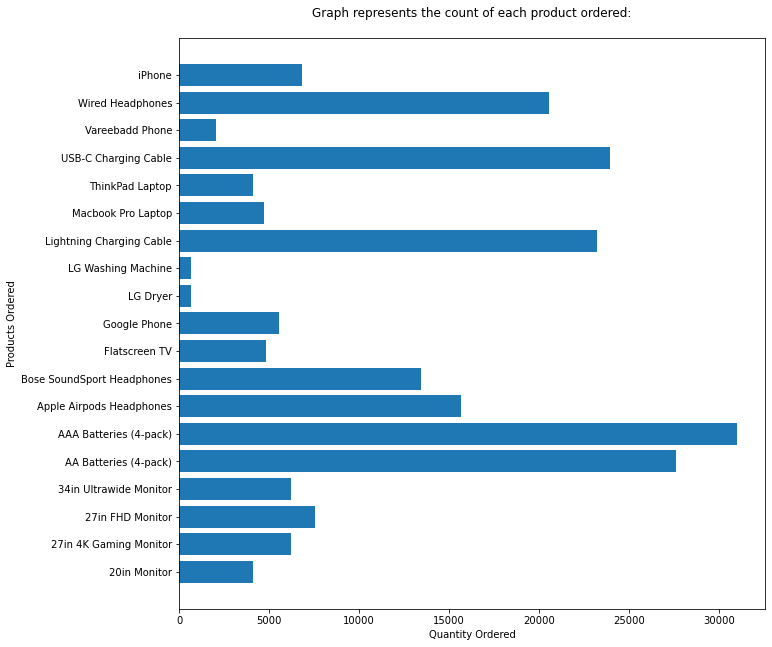

In [30]:
import matplotlib
prod=all_months_data.groupby('Product').sum()
prod_list=prod.index
widths=1.0
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5)
#plotting the graph to find the max ordered product:
plt.barh(prod_list,prod['Quantity Ordered'])
plt.yticks(prod_list)
plt.title('Graph represents the count of each product ordered:\n')
plt.ylabel('Products Ordered')
plt.xlabel('Quantity Ordered')
plt.show()

In [33]:
#Grouping the average price each product is being selled:
Prices=all_months_data.groupby('Product').mean()['Price Each']


<ipython-input-46-220a72e71f03>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(prod_list,rotation=90)


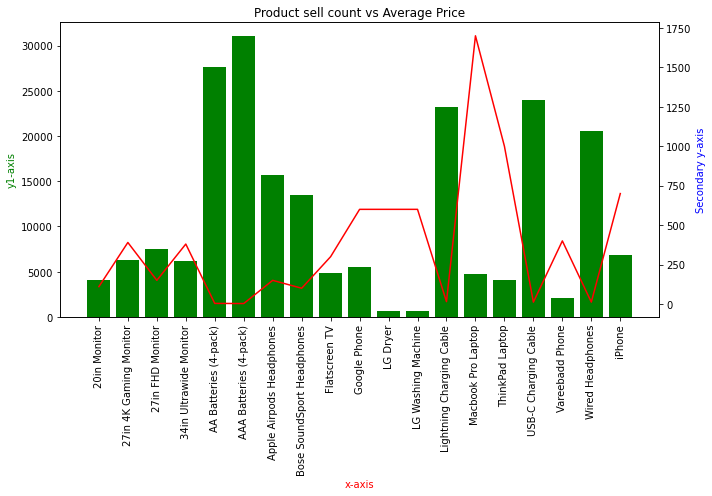

In [46]:
#Ploting a graph along with the previous graph
ig, ax = plt.subplots(figsize = (10, 7))
plt.title('Product sell count vs Average Price')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.bar(prod_list,prod['Quantity Ordered'], color = 'g')
ax2.plot(prod_list, Prices, color = 'r')
 
# giving labels to the axises
ax.set_xlabel('x-axis', color = 'r')
ax.set_ylabel('y1-axis', color = 'g')
plt.xticks(rotation=90)
# secondary y-axis label
ax2.set_ylabel('Secondary y-axis', color = 'b')
ax.set_xticklabels(prod_list,rotation=90)
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()